<a href="https://colab.research.google.com/github/Namanns7cr7/AI-mental-health-tracker/blob/main/mental_health_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/mental\ health
!pwd


Mounted at /content/drive
/content/drive/MyDrive/mental health
/content/drive/MyDrive/mental health


In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/mental health/prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv("/content/drive/MyDrive/mental health/mental-and-substance-use-as-share-of-disease (1).csv")
df3 = pd.read_csv("/content/drive/MyDrive/mental health/prevalence-of-depression-males-vs-females.csv")
df4 = pd.read_csv("/content/drive/MyDrive/mental health/share-with-depression.csv")
df5 = pd.read_csv("/content/drive/MyDrive/mental health/share-with-mental-and-substance-disorders.csv")
df6 = pd.read_csv("/content/drive/MyDrive/mental health/share-with-mental-or-substance-disorders-by-sex.csv")




In [ ]:
import pandas as pd
import os
folder_path = '/content/drive/MyDrive/mental health'
all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
files_to_exclude = ["prevalence-by-mental-and-substance-use-disorder.csv", "mental-and-substance-use-as-share-of-disease (1).csv"]
files_to_import = [f for f in all_files if f not in files_to_exclude]
dfs = {}
for file in files_to_import:
  try:
    file_path = os.path.join(folder_path, file)
    dfs[file] = pd.read_csv(file_path)
    print(f"Successfully imported: {file}")
  except Exception as e:
    print(f"Error importing {file}: {e}")


Successfully imported: share-with-depression.csv
Successfully imported: share-with-mental-and-substance-disorders.csv
Successfully imported: share-with-mental-or-substance-disorders-by-sex.csv
Successfully imported: prevalence-of-depression-males-vs-females.csv
Error importing shap_dependence_Schizophrenia_year_3.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error importing time_series_prediction.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error importing shap_dependence_Bipolar_disorder_year_1.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error importing shap_feature_impact.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error importing shap_dependence_Bipolar_disorder_year_2.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error importing shap_feature_importance.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte


In [ ]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [ ]:
df2.tail(10)

Entity Code  Year  \
6830  Zimbabwe  ZWE  2010   
6831  Zimbabwe  ZWE  2011   
6832  Zimbabwe  ZWE  2012   
6833  Zimbabwe  ZWE  2013   
6834  Zimbabwe  ZWE  2014   
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
6830                                           1.606235                                                
6831                                           1.758867                                                
6832                                           1.905674                                                
6833                                           2.024167                                                
6834                                           2.112216                                                
6835                                           2.193166                                                
6836                                           2.279813                                                
6837                                           2.364265                                                
6838                                           2.472949                                                
6839                                           2.525892

In [ ]:
data = pd.merge(df1, df2)
data.head(10)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

In [ ]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)                     0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [ ]:
data.drop('Code', axis=1, inplace=True)

In [ ]:
data.tail(10)

Entity  Year  \
6830  Zimbabwe  2010   
6831  Zimbabwe  2011   
6832  Zimbabwe  2012   
6833  Zimbabwe  2013   
6834  Zimbabwe  2014   
6835  Zimbabwe  2015   
6836  Zimbabwe  2016   
6837  Zimbabwe  2017   
6838  Zimbabwe  2018   
6839  Zimbabwe  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.207180                          
6831                                           0.207336                          
6832                                           0.207741                          
6833                                           0.208280                          
6834                                           0.208857                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.556640                             
6831                                           0.557104                             
6832                                           0.557908                             
6833                                           0.558888                             
6834                                           0.559929                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.094490                             
6831                                           0.094871                             
6832                                           0.095639                             
6833                                           0.096950                             
6834                                           0.098356                             
6835                                           0.099610                             
6836                                           0.100821                             
6837                                           0.101671                             
6838                                           0.102398                             
6839                                           0.102902                             

      Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           3.291569                              
6831                                           3.292964                              
6832                                           3.297124                              
6833                                           3.302881                              
6834                                           3.309390                              
6835                                           3.315701                              
6836                                           3.324230                              
6837                                           3.330569                              
6838                                           3.317500                              
6839                                           3.283934                              

      Prevalence - Dr

In [ ]:
data.size, data.shape

(68400, (6840, 10))

In [ ]:

data = data.set_axis(['country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis='columns')


In [ ]:
data = data.set_axis(['country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis='columns')
# Renaming the columns of the DataFrame data with more descriptive names, the inplace argument has been removed and the result assigned back to the 'data' variable

[]

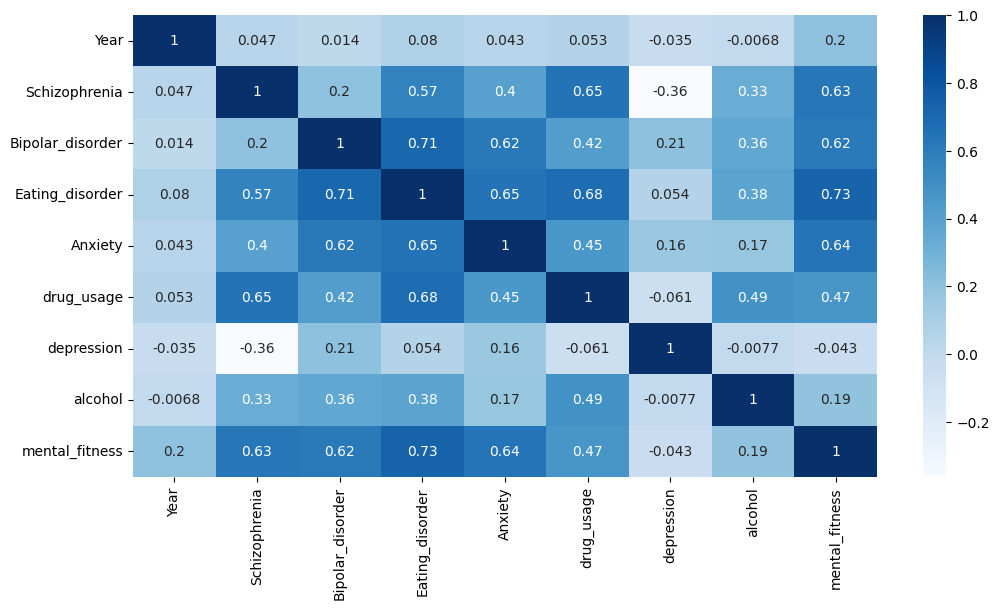

In [ ]:

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
numeric_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
plt.plot()

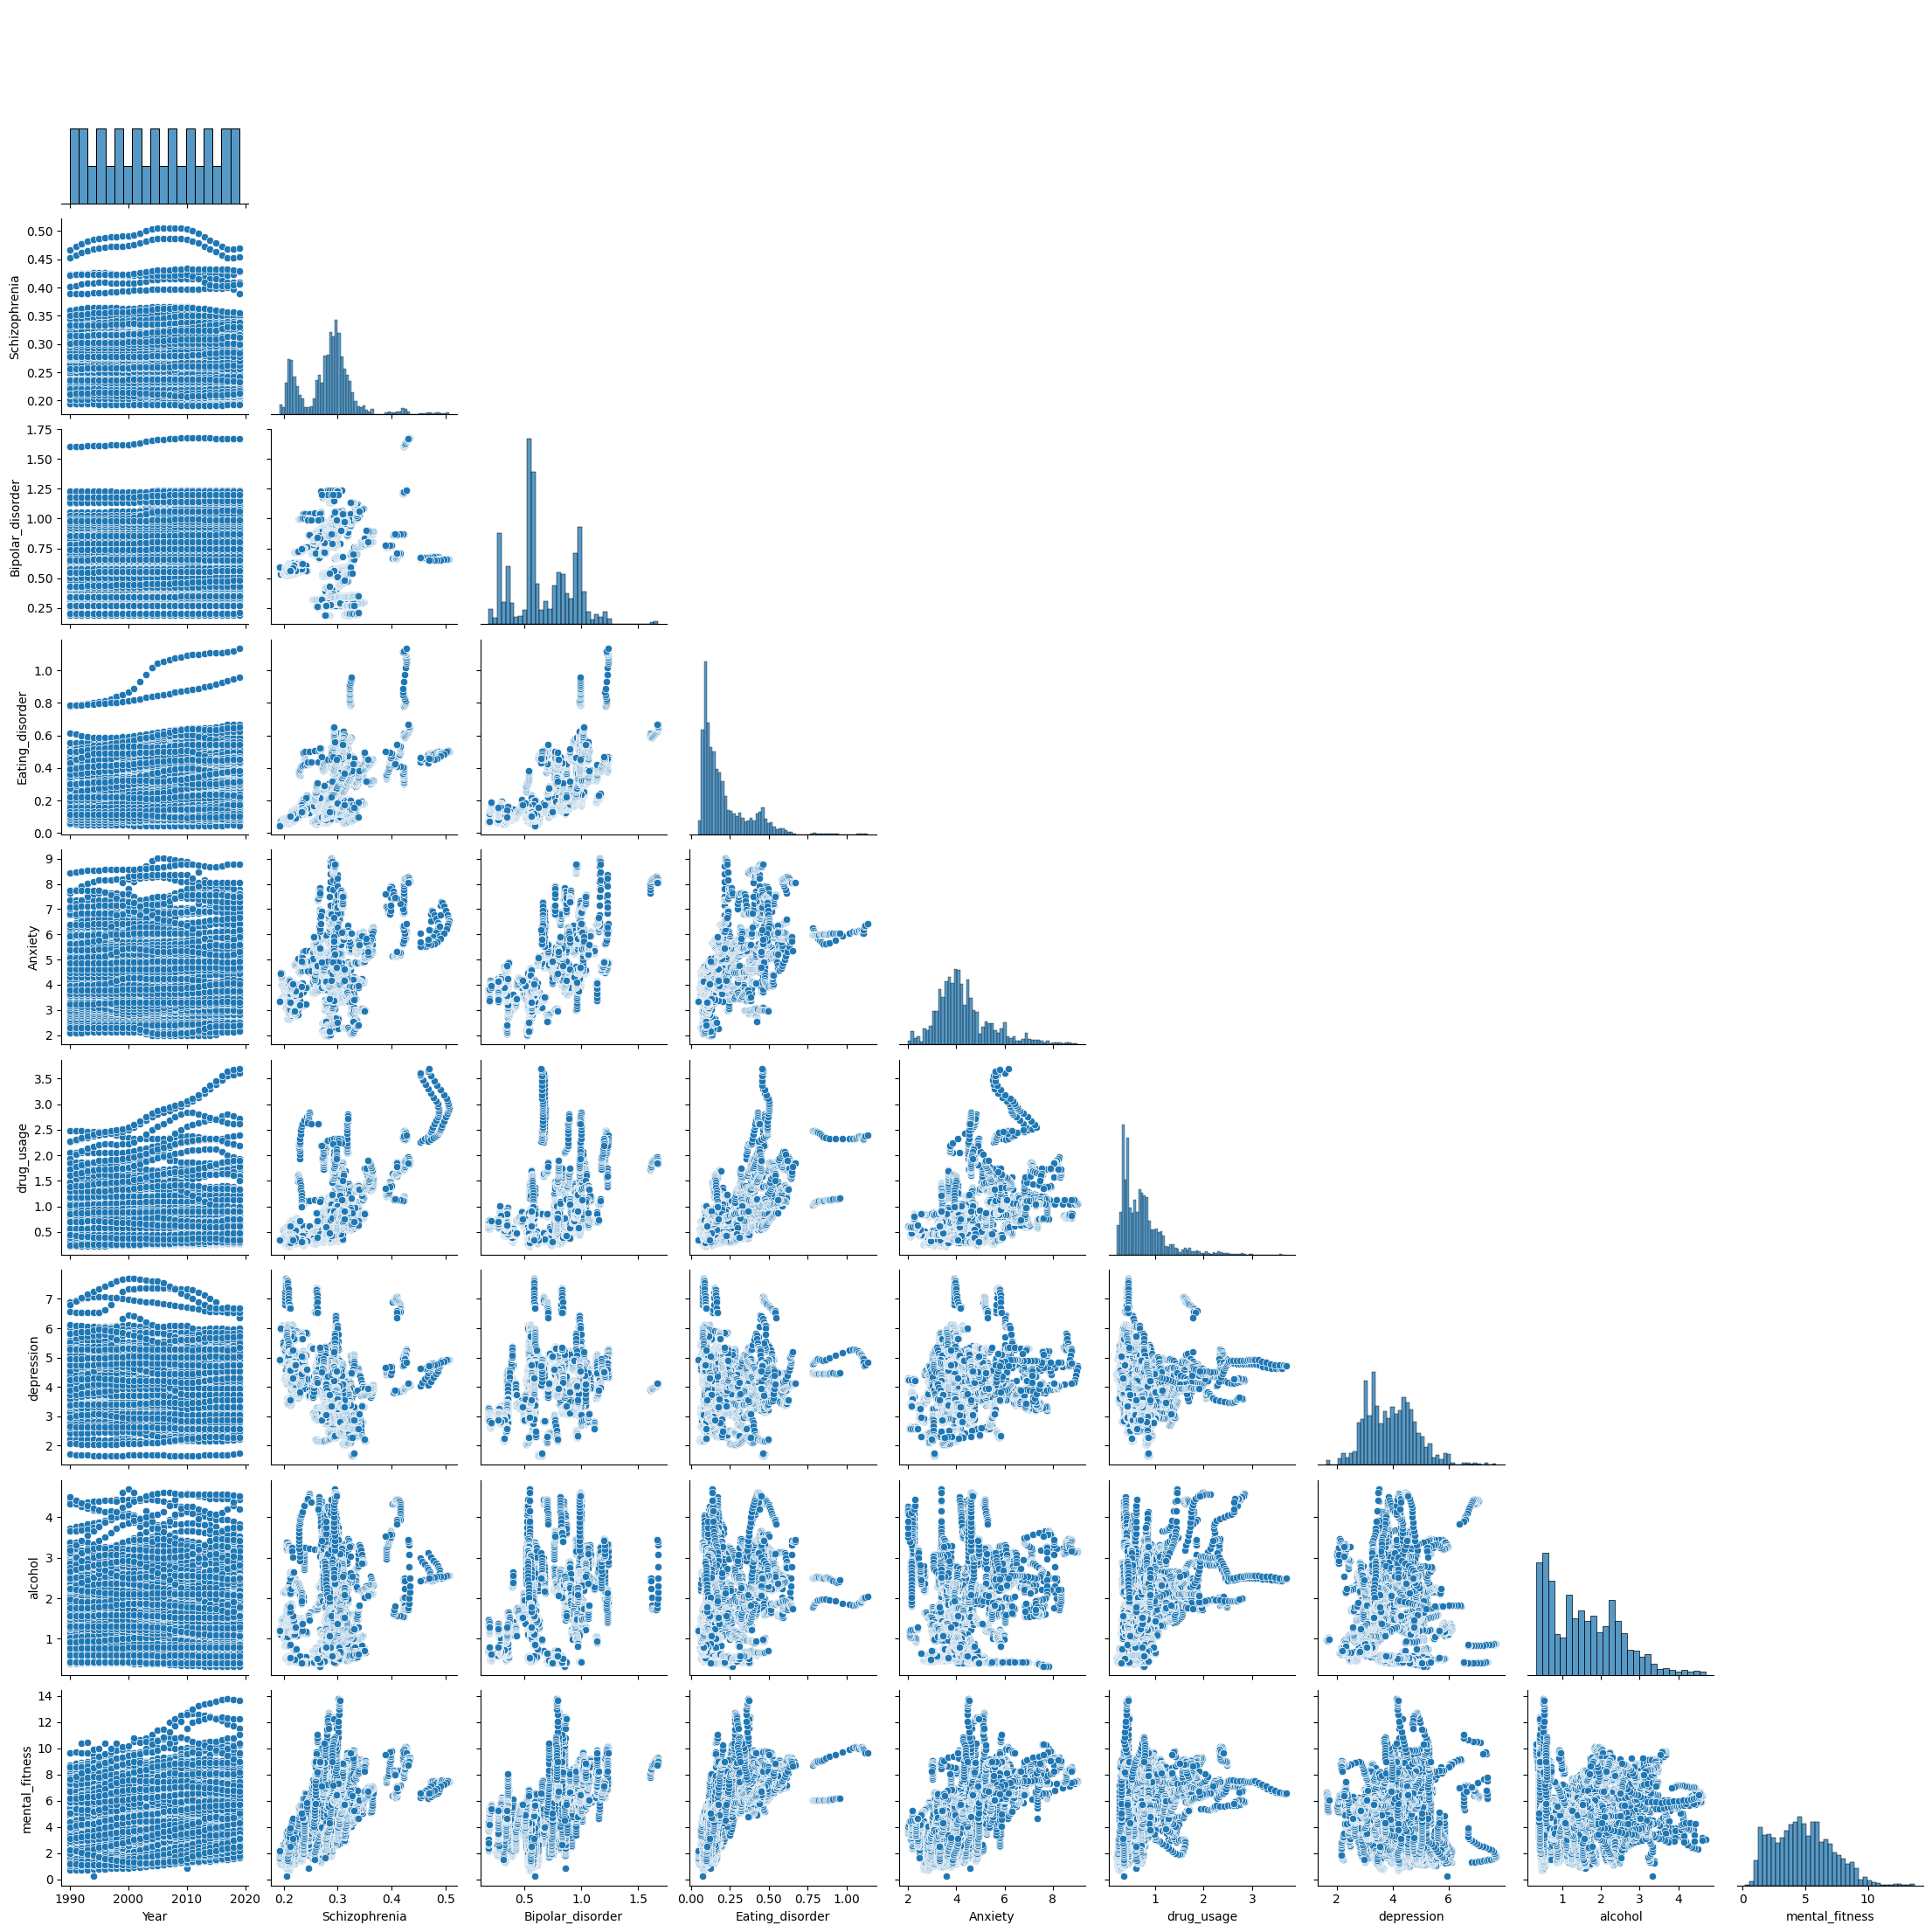

In [ ]:
sns.pairplot(data, corner=True)
plt.show()

In [ ]:
mean = data['mental_fitness'].mean()
# Calculating the mean value of the 'mental_fitness' column in the DataFrame data
mean

np.float64(4.8180618117506135)

In [ ]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()
# Creating a pie chart to visualize the distribution of mental fitness across different years

In [ ]:
fig = px.line(data, x='Year', y='mental_fitness', color='country', markers=True, color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()
# Creating a line plot to visualize the trend of mental fitness over time, differentiated by country

In [ ]:
fig = px.line(data, x='Year', y='Schizophrenia', color='country', markers=True, color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()
# Creating a line plot to visualize the trend of schizophrenia prevalence over time, differentiated by country

In [ ]:
fig = px.scatter(data, x='Year', y='depression', color='country', size='mental_fitness', hover_data=['Schizophrenia'], template='plotly_dark')
fig.show()
# Creating a scatter plot to visualize the relationship between depression and mental fitness, differentiated by country

In [ ]:
fig = px.bar(data, x='country', y='Bipolar_disorder', color='Year', barmode='group', template='plotly_dark')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
# Creating a grouped bar chart to compare the prevalence of Bipolar Disorder across countries and years

In [ ]:
fig = px.box(data, x='Year', y='Eating_disorder', color='country', template='plotly_dark')
fig.show()
# Creating a box plot to visualize the distribution of Eating Disorder prevalence across different years and countries

In [ ]:
fig = px.histogram(data, x='Anxiety', color='country', marginal='box', template='plotly_dark')
fig.show()
# Creating a histogram with overlaid box plots to visualize the distribution of Anxiety levels across different countries

In [ ]:
fig = px.scatter_matrix(data, dimensions=['depression', 'alcohol', 'drug_usage', 'mental_fitness'], color='country', template='plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(data, x='Year', y='depression', size='mental_fitness', color='country', template='plotly_dark')
fig.show()

In [ ]:
fig = px.bar(data, x='country', y='Bipolar_disorder', color='Year', barmode='group', template='plotly_dark')
fig.show()

In [ ]:
df= data
df.head(10)

country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   
5  Afghanistan  1995       0.224713          0.716686         0.111129   
6  Afghanistan  1996       0.223690          0.716388         0.107786   
7  Afghanistan  1997       0.222424          0.716143         0.103931   
8  Afghanistan  1998       0.221129          0.716139         0.100343   
9  Afghanistan  1999       0.220065          0.716323         0.097946   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986  
5  4.780851    0.428578    5.098495  0.445422        1.738272  
6  4.777272    0.426393    5.100580  0.444837        1.778098  
7  4.775242    0.423720    5.105474  0.443938        1.781815  
8  4.777377    0.422491    5.113707  0.442665        1.729402  
9  4.782067    0.421215    5.120480  0.441428        1.850988

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 534.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df_shape = df.shape
print(df_shape)

(6840, 10)


In [ ]:
import sklearn.model_selection as ms

X = df.drop('mental_fitness', axis=1)
y = df['mental_fitness']

xtrain, xtest, ytrain, ytest = ms.train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
print("xtrain:", xtrain.shape)
print("xtest:", xtest.shape)
print("\nytrain:", ytrain.shape)
print("ytest:", ytest.shape)

xtrain: (5472, 9)
xtest: (1368, 9)

ytrain: (5472,)
ytest: (1368,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ytrain_pred = lr.predict(xtrain)

mse = mean_squared_error(ytrain, ytrain_pred)
r2 = r2_score(ytrain, ytrain_pred)
print("Linear Regression model performance on the training set")
print("-------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(np.sqrt(mse)))
print("R2 Score: {}".format(r2))

Linear Regression model performance on the training set
-------------------------------------------------------
MSE: 1.389959372405798
RMSE: 1.1789653821914357
R2 Score: 0.7413245790025275


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)
print("Random Forest Regressor model performance on the training set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Random Forest Regressor model performance on the training set
------------------------------------------------------------
MSE: 0.005064473647791728
RMSE: 0.07116511538522037
R2 Score: 0.9990574869460352


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop(['mental_fitness', 'country'], axis=1)
y = data['mental_fitness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f},")
print(f"R²: {r2:.4f}")

MSE: 0.1016,
R²: 0.9800


In [ ]:
lr_scores = lr.score(xtest, ytest)
rf_scores = rf.score(xtest, ytest)

print("Results of Models")
print("---------------------")
lr_scores = lr.score(xtest, ytest)
rf_scores = rf.score(xtest, ytest)

print("Results of Models")
print("---------------------")
print("Linear Regression value: {:.2f}".format(lr_scores))
print("Random Forest Regressor value: {:.2f}".format(rf_scores))
print("XGBOOST value {:.4f}".format(r2))


Results of Models
---------------------
Results of Models
---------------------
Linear Regression value: 0.76
Random Forest Regressor value: 0.99
XGBOOST value 0.9800


## Country Encoding and Mapping:

This section converts categorical country names into numeric values that machine learning algorithms can process. Creating a mapping dictionary preserves the ability to interpret results in terms of actual country names later.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create and fit the encoder with country data
label_encoder = LabelEncoder()
label_encoder.fit(data['country'])

# Create mapping dictionary for later interpretation
country_mapping = dict(zip(label_encoder.transform(data['country'].unique()),
                           data['country'].unique()))


##  Temporal Feature Engineering:

This creates new features that capture temporal patterns in mental health data, including previous year values, year-over-year changes, and moving averages for each disorder.

Standard features only capture point-in-time measurements, while these temporal features reveal trends and momentum in mental health metrics, significantly improving the model's predictive power over time.

In [ ]:

data = data.sort_values(['country', 'Year'])
data_with_features = data.copy()

for country in data['country'].unique():
    country_mask = (data_with_features['country'] == country)
    country_data = data_with_features[country_mask]

    for feature in ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
                   'Anxiety', 'drug_usage', 'depression', 'alcohol']:

        data_with_features.loc[country_mask, f'{feature}_prev'] = country_data[feature].shift(1)
        data_with_features.loc[country_mask, f'{feature}_change'] = (
            country_data[feature] - country_data[feature].shift(1)
        )
        data_with_features.loc[country_mask, f'{feature}_3yr_avg'] = country_data[feature].rolling(3).mean()
data_clean = data_with_features.dropna()

## Time Window Analysis for Sequential Patterns:

This implements a sliding window approach where sequences of 3 consecutive years are used to predict the mental fitness level for the following year.

By structuring the data as sequences rather than individual points, the model can learn patterns of progression in mental health over time, significantly improving forecasting capabilities.

In [ ]:

window_size = 3
windowed_data = []

for country in data['country'].unique():
    country_data = data[data['country'] == country].sort_values('Year')

    if len(country_data) <= window_size:
        continue

    for i in range(len(country_data) - window_size):

        window = country_data.iloc[i:i+window_size]
        target = country_data.iloc[i+window_size]

        feature_dict = {
            'country': country,
            'target_year': target['Year'],
            'mental_fitness_target': target['mental_fitness']
        }
        for j, year_data in enumerate(window.iterrows()):
            year = year_data[1]['Year']
            for feature in ['Schizophrenia', 'Bipolar_disorder', 'Anxiety', 'depression']:
                feature_dict[f'{feature}_year_{j+1}'] = year_data[1][feature]

        windowed_data.append(feature_dict)

window_df = pd.DataFrame(windowed_data)
median_fitness = window_df['mental_fitness_target'].median()
window_df['mental_fitness_class'] = (window_df['mental_fitness_target'] > median_fitness).astype(int)

##  SMOTE Implementation for Class Balancing:
This section addresses class imbalance using `SMOTE` (Synthetic Minority Oversampling Technique) and trains an XGBoost classifier to predict mental health outcomes.

In [ ]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
X = window_df.drop(['mental_fitness_target', 'mental_fitness_class', 'country', 'target_year'], axis=1)
y = window_df['mental_fitness_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       620
           1       0.98      0.97      0.97       612

    accuracy                           0.97      1232
   macro avg       0.97      0.97      0.97      1232
weighted avg       0.97      0.97      0.97      1232



## SHAP Analysis for Model Interpretability:

This generates `SHAP` (Shapley Additive explanations) values to interpret the model's predictions, showing which features most strongly influence mental health outcomes.

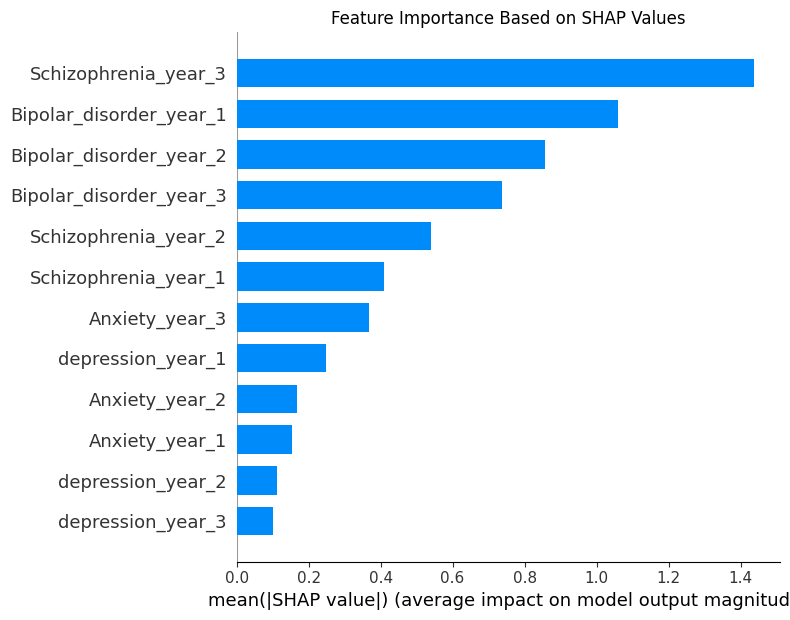

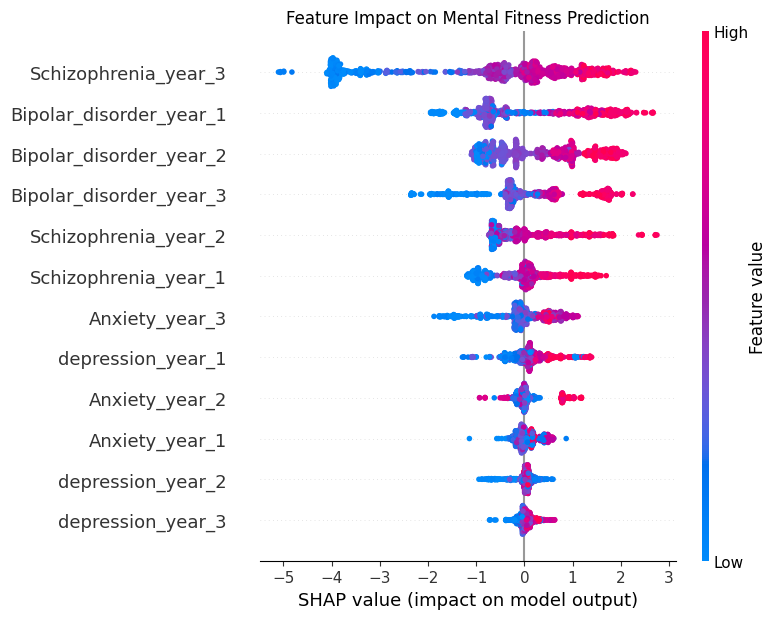

In [ ]:
import matplotlib.pyplot as plt
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('Feature Importance Based on SHAP Values')
plt.tight_layout()
plt.savefig('shap_feature_importance.png')
plt.show()
plt.close()

plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('Feature Impact on Mental Fitness Prediction')
plt.tight_layout()
plt.savefig('shap_feature_impact.png')
plt.show()
plt.close()

## Feature-Specific Dependence Analysis:

This creates dependence plots showing how specific features interact with model predictions across their value ranges.

Reveals non-linear relationships between mental health factors and outcomes, showing thresholds where disorders become particularly impactful on overall mental fitness.

<Figure size 1000x600 with 0 Axes>

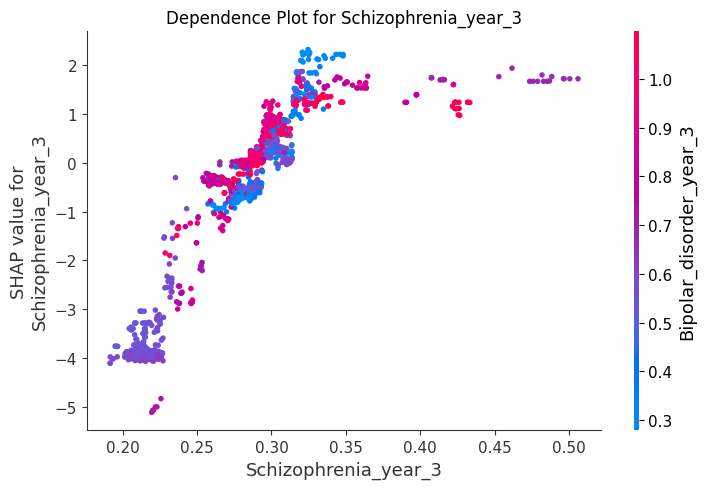

<Figure size 1000x600 with 0 Axes>

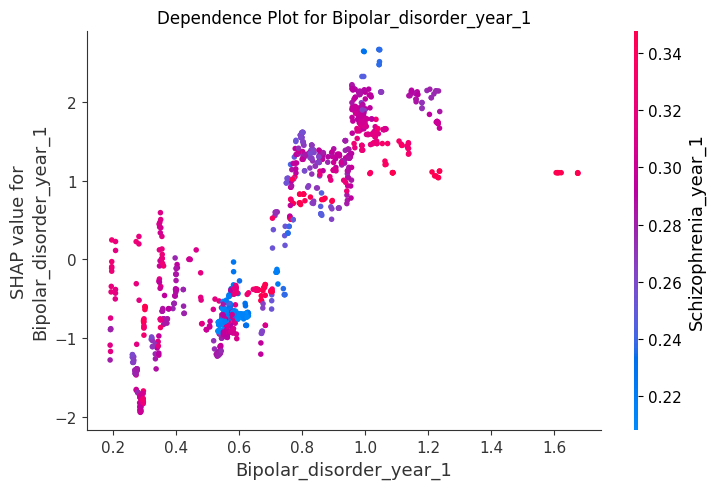

<Figure size 1000x600 with 0 Axes>

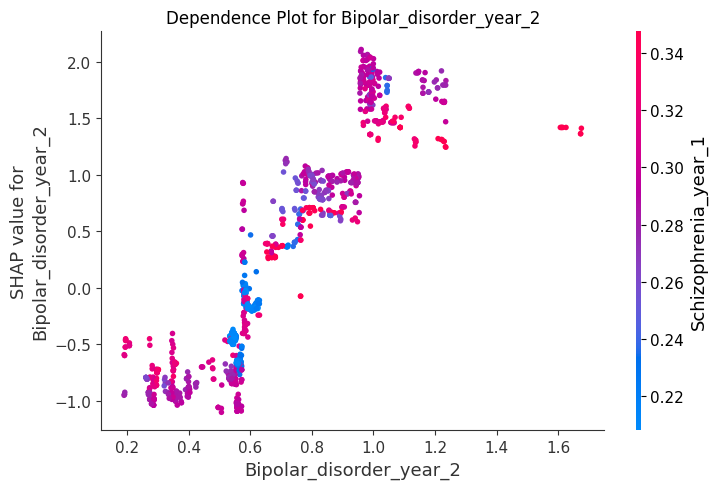

In [ ]:

feature_importance = pd.DataFrame(
    zip(X_test.columns, np.abs(shap_values.values).mean(0)),
    columns=['feature', 'importance']
).sort_values('importance', ascending=False)

top_features = feature_importance['feature'].tolist()[:3]
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values.values, X_test, show=False)
    plt.title(f'Dependence Plot for {feature}')
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{feature}.png')
    plt.show()
    plt.close()

##Time-Based Prediction Visualization:

This visualizes time-based mental health trends for specific countries and evaluates the importance of temporal features in the model.

In [ ]:

time_features = [col for col in X.columns if '_year_' in col]
time_importance = feature_importance[feature_importance['feature'].isin(time_features)]
print("Temporal Feature Importance:")
print(time_importance.head(10))

country_example = window_df['country'].unique()[0]
country_data = data[data['country'] == country_example].sort_values('Year')
years = country_data['Year'].values
mental_fitness = country_data['mental_fitness'].values

plt.figure(figsize=(12, 6))
plt.plot(years, mental_fitness, 'b-', label='Actual Mental Fitness')
plt.title(f'Mental Fitness Trend for {country_example}')
plt.xlabel('Year')
plt.ylabel('Mental Fitness (DALYs)')
plt.legend()
plt.grid(True)
plt.savefig('time_series_prediction.png')
plt.close()

Temporal Feature Importance:
                    feature  importance
8      Schizophrenia_year_3    1.437482
1   Bipolar_disorder_year_1    1.059507
5   Bipolar_disorder_year_2    0.857711
9   Bipolar_disorder_year_3    0.736389
4      Schizophrenia_year_2    0.539535
0      Schizophrenia_year_1    0.409380
10           Anxiety_year_3    0.367501
3         depression_year_1    0.247870
6            Anxiety_year_2    0.168417
2            Anxiety_year_1    0.155207


In [ ]:
# prompt: can we predict the mental health by writing our symtoms from the above trained model

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model (replace with your actual model loading)
# ... (Code to load your trained xgb_model) ...

# Example input features (replace with user input)
# Assuming the input format is similar to the training data
input_data = {
    'Schizophrenia_year_1': 0.2,
    'Bipolar_disorder_year_1': 0.15,
    'Anxiety_year_1': 0.3,
    'depression_year_1': 0.25,
    'Schizophrenia_year_2': 0.18,
    'Bipolar_disorder_year_2': 0.12,
    'Anxiety_year_2': 0.28,
    'depression_year_2': 0.22,
    'Schizophrenia_year_3': 0.22,
    'Bipolar_disorder_year_3': 0.16,
    'Anxiety_year_3': 0.33,
    'depression_year_3': 0.27,
    # ... add the other features similarly
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Make predictions
prediction = xgb_model.predict(input_df)

# Interpret the prediction
if prediction[0] == 1:
    print("Prediction: Above median mental fitness")
else:
    print("Prediction: Below median mental fitness")


Prediction: Below median mental fitness


In [ ]:
def ask_question(prompt):
    answer = input(prompt + " (yes/no): ").strip().lower()
    return answer == "yes"

def mental_health_screen():
    print("🧠 Welcome to the Mental Health Self-Screener (non-clinical)")
    print("Please answer the following questions honestly:\n")

    scores = {
        "depression": 0,
        "anxiety": 0,
        "ocd": 0,
        "ptsd": 0,
        "bipolar": 0,
    }

    # Depression
    if ask_question("Do you often feel sad or empty?"):
        scores["depression"] += 1
    if ask_question("Have you lost interest in activities you used to enjoy?"):
        scores["depression"] += 1
    if ask_question("Do you experience fatigue or low energy nearly every day?"):
        scores["depression"] += 1

    # Anxiety
    if ask_question("Do you frequently feel nervous or on edge?"):
        scores["anxiety"] += 1
    if ask_question("Do you find it hard to stop worrying, even about small things?"):
        scores["anxiety"] += 1
    if ask_question("Do you experience sudden feelings of panic or dread?"):
        scores["anxiety"] += 1

    # OCD
    if ask_question("Do you have repetitive thoughts that you can't control?"):
        scores["ocd"] += 1
    if ask_question("Do you feel compelled to do things repeatedly (like checking, counting, or washing)?"):
        scores["ocd"] += 1

    # PTSD
    if ask_question("Have you experienced a traumatic event that still haunts you?"):
        scores["ptsd"] += 1
    if ask_question("Do you get nightmares or flashbacks related to trauma?"):
        scores["ptsd"] += 1

    # Bipolar
    if ask_question("Do you experience extreme mood swings (high energy to deep sadness)?"):
        scores["bipolar"] += 1
    if ask_question("Do you sometimes feel overly energetic, talkative, or euphoric for days?"):
        scores["bipolar"] += 1

    print("\nAnalyzing responses...\n")

    # Determine top score
    max_score = max(scores.values())
    likely_conditions = [cond for cond, score in scores.items() if score == max_score and score > 0]

    if not likely_conditions:
        print("⚠️ Based on your responses, no clear pattern emerged. However, if you're struggling, consider talking to a mental health professional.")
    else:
        print("🧾 You may be showing signs of the following condition(s):")
        for cond in likely_conditions:
            print(f" - {cond.capitalize()}")
        print("\nThis is not a diagnosis. Please consult a professional for further help.")

# Run chatbot
if __name__ == "__main__":
    while True:
        mental_health_screen()
        again = input("\nWould you like to restart the check? (yes/no): ").strip().lower()
        if again != "yes":
            break


🧠 Welcome to the Mental Health Self-Screener (non-clinical)
Please answer the following questions honestly:

Do you often feel sad or empty? (yes/no): no
Have you lost interest in activities you used to enjoy? (yes/no): yes
Do you experience fatigue or low energy nearly every day? (yes/no): no
Do you frequently feel nervous or on edge? (yes/no): no
Do you find it hard to stop worrying, even about small things? (yes/no): no
Do you experience sudden feelings of panic or dread? (yes/no): yes
Do you have repetitive thoughts that you can't control? (yes/no): no
Do you feel compelled to do things repeatedly (like checking, counting, or washing)? (yes/no): yes
Have you experienced a traumatic event that still haunts you? (yes/no): no
Do you get nightmares or flashbacks related to trauma? (yes/no): no
Do you experience extreme mood swings (high energy to deep sadness)? (yes/no): yes
Do you sometimes feel overly energetic, talkative, or euphoric for days? (yes/no): no

Analyzing responses...

🧾

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# --- START: Placeholder for Data Loading, Preprocessing, and Model Training ---
# This section needs to exist in your actual script before calling the chatbot.
# Example structure (replace with your actual code):

# Load data
# df = pd.read_csv('your_mental_health_data.csv')

# Preprocessing (example steps)
# df.dropna(inplace=True) # Handle missing values
# ... other cleaning ...

# Feature Engineering / Selection (assuming relevant columns exist)
# features = ['Sex', 'Sleep_Hours', 'Stress_Level', 'Exercise_Days',
#             'Social_Interaction', 'Alcohol_Consumption', 'Screen_Time',
#             'Healthy_Meals']
# target = 'Mental_Disorder_Type' # Replace with your actual target column name

# df_final = df[features + [target]].copy() # Create df_final

# Encoding
# le_sex = LabelEncoder() # Assuming 'Sex' needs encoding if not already 0/1
# df_final['Sex'] = le_sex.fit_transform(df_final['Sex']) # Example: Male=1, Female=0

# le = LabelEncoder() # Encoder for the target variable
# df_final['Target'] = le.fit_transform(df_final[target])

# Prepare data for model
# X = df_final.drop(['Target', target], axis=1) # Drop original and encoded target
# y = df_final['Target']

# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# --- END: Placeholder ---

# --- !! IMPORTANT !! ---
# The following are *placeholders* - replace them with your actual trained objects
# If you run this cell directly without the preceding steps, it will fail later.
# You MUST have df_final, clf, and le defined from your data/model steps.

# Example Placeholder Data (REMOVE OR REPLACE WITH YOUR ACTUAL DATA LOADING/PREP)
data = {
    'Sex': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0], # 1: Male, 0: Female
    'Sleep_Hours': [6, 8, 5, 7, 9, 6, 7, 8, 5, 7],
    'Stress_Level': [8, 3, 9, 5, 2, 7, 6, 4, 8, 5],
    'Exercise_Days': [1, 5, 0, 3, 6, 2, 4, 5, 1, 3],
    'Social_Interaction': [3, 8, 2, 7, 9, 4, 6, 8, 3, 7],
    'Alcohol_Consumption': [3, 0, 4, 1, 0, 2, 1, 0, 3, 1],
    'Screen_Time': [10, 4, 12, 6, 3, 9, 7, 5, 11, 6],
    'Healthy_Meals': [1, 3, 1, 2, 3, 2, 2, 3, 1, 2],
    'Mental_Disorder_Type': ['Depression', 'Normal', 'Anxiety', 'Normal', 'Normal', 'Depression', 'Anxiety', 'Normal', 'Depression', 'Normal']
}
df_final = pd.DataFrame(data)
le = LabelEncoder()
df_final['Target'] = le.fit_transform(df_final['Mental_Disorder_Type'])
X = df_final[['Sex', 'Sleep_Hours', 'Stress_Level', 'Exercise_Days', 'Social_Interaction', 'Alcohol_Consumption', 'Screen_Time', 'Healthy_Meals']]
y = df_final['Target']
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y) # Train on the placeholder data

# Step 4: Enhanced Interactive Chatbot (Modified Function Definition)
def mental_health_chatbot(data_df, model, label_encoder): # Added parameters
    print("🌟 Welcome to the AI Mental Health Chatbot 🌟")
    print("Let's understand your daily lifestyle for a better mental health insight.\n")

    # Gender
    gender_input = input("Are you Male or Female? ").strip().capitalize()
    if gender_input not in ['Male', 'Female']:
        print("Invalid input. Please enter 'Male' or 'Female'.")
        return
    # Assuming your original encoding was Male=1, Female=0
    # Adjust if your encoding was different
    gender_encoded = 1 if gender_input == 'Male' else 0

    # Daily Lifestyle Questions
    try:
        sleep_hours = float(input("🛌 How many hours do you sleep daily (average)? "))
        stress_level = int(input("💼 Rate your daily stress (1-10): "))
        exercise_days = int(input("🏃‍♂️ How many days per week do you exercise? "))
        social_interaction = int(input("🗣️ Rate your social interaction level (1-10): "))
        alcohol_consumption = int(input("🍷 How often do you consume alcohol weekly? (times per week): "))
        screen_time = int(input("📱 How many hours daily do you spend on screens (phone, computer)? "))
        healthy_meals = int(input("🥗 How many healthy meals do you have daily? "))
    except ValueError:
        print("Please enter valid numbers for all inputs.")
        return

    # Simulate feature modification based on inputs
    # Use the passed 'data_df' instead of 'df_final'
    gender_profile = data_df[data_df['Sex'] == gender_encoded]
    if gender_profile.empty:
        print("⚠️ No data found for the selected gender. Using overall average as a base.")
        # Use overall mean if no data for specific gender (make sure 'Target' is dropped)
        base_profile = data_df.drop(columns=['Target', 'Mental_Disorder_Type'], errors='ignore').mean()
    else:
        # Calculate mean for the specific gender (make sure 'Target' is dropped)
        base_profile = gender_profile.drop(columns=['Target', 'Mental_Disorder_Type'], errors='ignore').mean()


    # Define weights for modifiers (replace with research-based values if possible)
    # Ensure keys match predicted_disorder.lower() output
    weights = {
        'depression': {'sleep_hours': 0.03, 'stress_level': 0.04, 'exercise_days': -0.02, 'social_interaction': -0.03, 'alcohol_consumption': 0.03, 'screen_time': 0.02, 'healthy_meals': -0.02},
        'anxiety': {'sleep_hours': 0.02, 'stress_level': 0.05, 'exercise_days': -0.03, 'social_interaction': -0.02, 'alcohol_consumption': 0.02, 'screen_time': 0.01, 'healthy_meals': -0.01},
        'normal': {}, # Example: Maybe 'normal' doesn't need specific lifestyle adjustments or has different ones
        # ... add weights for other conditions based on le.classes_ ...
    }

    # Function to calculate condition-specific modifiers
    def calculate_modifier(weights_dict):
        modifier = 0
        # Define reference/ideal points (adjust these based on expert knowledge)
        ideal_sleep = 7.5
        ideal_stress = 3
        ideal_exercise = 4
        ideal_social = 7
        ideal_alcohol = 1
        ideal_screen = 4
        ideal_meals = 3

        # Calculate deviations from ideal (or reference) and apply weights
        modifier += weights_dict.get('sleep_hours', 0) * (ideal_sleep - sleep_hours)
        modifier += weights_dict.get('stress_level', 0) * (stress_level - ideal_stress)
        modifier += weights_dict.get('exercise_days', 0) * (ideal_exercise - exercise_days)
        modifier += weights_dict.get('social_interaction', 0) * (ideal_social - social_interaction)
        modifier += weights_dict.get('alcohol_consumption', 0) * (alcohol_consumption - ideal_alcohol)
        modifier += weights_dict.get('screen_time', 0) * (screen_time - ideal_screen)
        modifier += weights_dict.get('healthy_meals', 0) * (ideal_meals - healthy_meals)
        return modifier

    # --- Make prediction first to use in modification ---
    # Prepare initial input features (using the *order* the model was trained on)
    # Ensure the order matches X.columns used during training
    try:
        # Drop 'Sex' because we add gender_encoded at the beginning
        # Make sure base_profile contains exactly the features needed (and in order)
        # It's safer to reindex based on the model's expected features
        expected_features = model.feature_names_in_ # Get feature names from the trained model
        base_features_ordered = base_profile.reindex(expected_features)
        # Ensure 'Sex' is handled correctly (remove if present, as we prepend gender_encoded)
        if 'Sex' in base_features_ordered.index:
             base_features_ordered = base_features_ordered.drop('Sex')

        initial_input_vector = np.insert(base_features_ordered.values, 0, gender_encoded) # Prepend gender

        # Make initial prediction to determine which condition to modify for
        # Use the passed 'model' and 'label_encoder'
        initial_prediction = model.predict([initial_input_vector])[0]
        predicted_disorder = label_encoder.inverse_transform([initial_prediction])[0]

        # Now apply modifiers based on the predicted disorder
        # Use .lower() for case-insensitive matching with weights dictionary keys
        modifier_weights = weights.get(predicted_disorder.lower(), {}) # Handle KeyError safely
        modifier_value = calculate_modifier(modifier_weights)

        # Prepare adjusted input features
        # Add the scalar modifier to all features (excluding 'Sex' which is handled separately)
        adjusted_features = base_features_ordered.values + modifier_value
        input_vector = np.insert(adjusted_features, 0, gender_encoded) # Prepend gender again

        # Predict using the adjusted features
        prediction = model.predict([input_vector])[0]
        final_predicted_disorder = label_encoder.inverse_transform([prediction])[0]

        # Output
        print(f"\n🤖 Initial assessment suggested risk for: {predicted_disorder}")
        print(f"🤖 After considering your specific lifestyle inputs, the refined assessment suggests potential risk for: **{final_predicted_disorder}**")
        print("⚠️ This is an AI-based prediction and lifestyle assessment. It is NOT a diagnosis.")
        print("   Please consult a qualified medical or mental health professional for an accurate diagnosis and guidance.")
        print("Thank you for using our chatbot. Stay healthy! 🌿")

    except Exception as e:
        print(f"\n❌ An error occurred during prediction: {e}")
        print("   This might be due to inconsistencies between input data and the trained model's expectations.")
        print("   Please ensure the feature order and types match the model training.")


# Step 5: Run Chatbot (Modified Function Call)
# Ensure df_final, clf, le are defined from your data loading/training steps above
mental_health_chatbot(df_final, clf, le) # Pass the required objects

🌟 Welcome to the AI Mental Health Chatbot 🌟
Let's understand your daily lifestyle for a better mental health insight.

Are you Male or Female? Male
🛌 How many hours do you sleep daily (average)? 6
💼 Rate your daily stress (1-10): 1
🏃‍♂️ How many days per week do you exercise? 5
🗣️ Rate your social interaction level (1-10): 10
🍷 How often do you consume alcohol weekly? (times per week): 0
📱 How many hours daily do you spend on screens (phone, computer)? 12
🥗 How many healthy meals do you have daily? 2

🤖 Initial assessment suggested risk for: Depression
🤖 After considering your specific lifestyle inputs, the refined assessment suggests potential risk for: **Depression**
⚠️ This is an AI-based prediction and lifestyle assessment. It is NOT a diagnosis.
   Please consult a qualified medical or mental health professional for an accurate diagnosis and guidance.
Thank you for using our chatbot. Stay healthy! 🌿


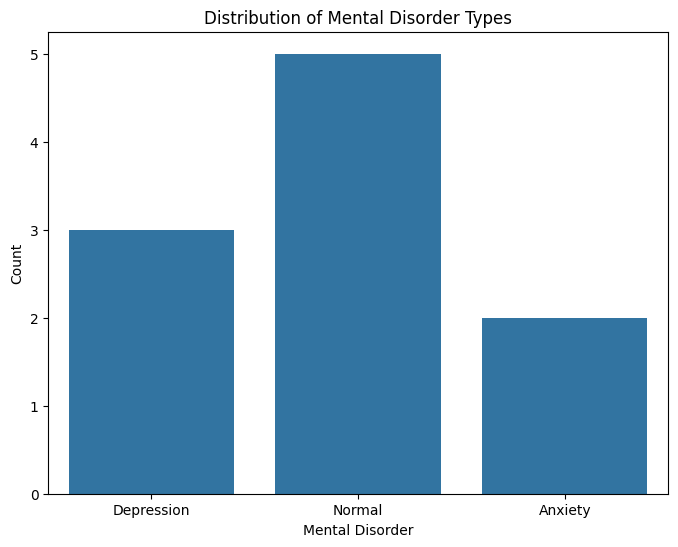

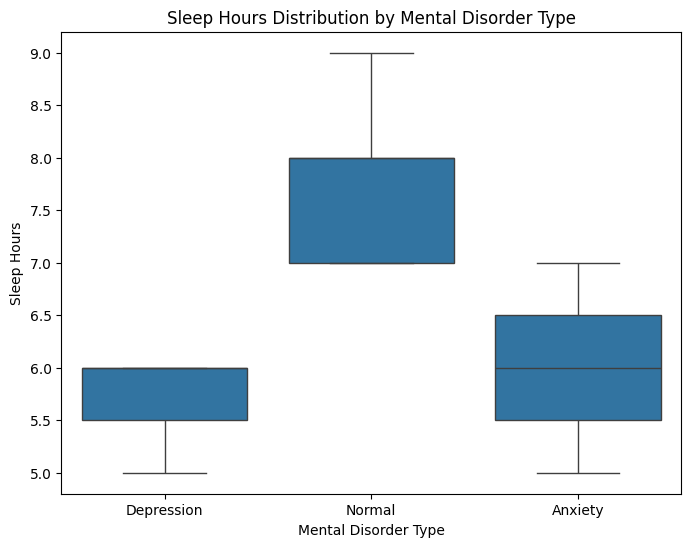

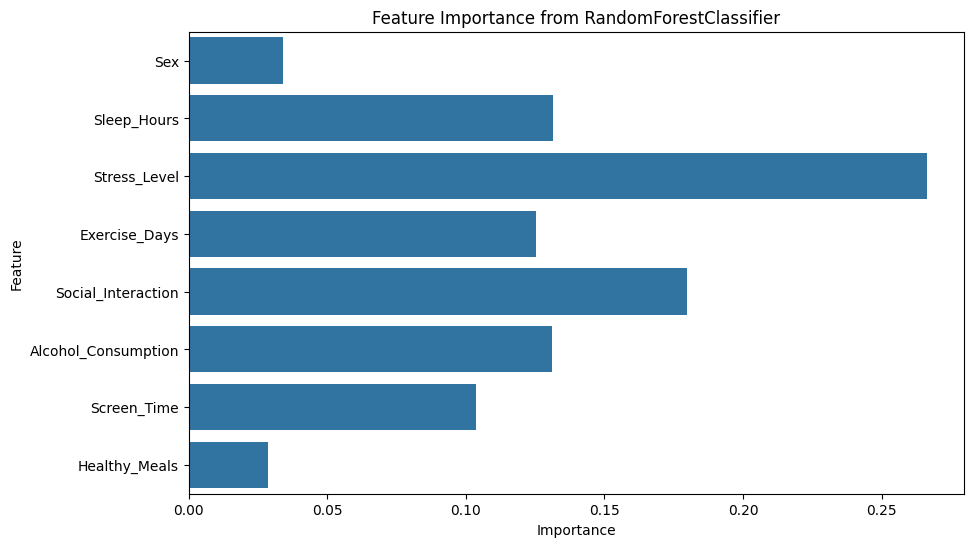

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_final' is your DataFrame with 'Mental_Disorder_Type' and features.

# 1. Distribution of Mental Disorder Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Disorder_Type', data=df_final)
plt.title('Distribution of Mental Disorder Types')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')
plt.show()


# 3. Box plots or violin plots for feature distributions by disorder type
# Example using 'Sleep_Hours'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mental_Disorder_Type', y='Sleep_Hours', data=df_final)
plt.title('Sleep Hours Distribution by Mental Disorder Type')
plt.xlabel('Mental Disorder Type')
plt.ylabel('Sleep Hours')
plt.show()


# 4. Feature Importance from the RandomForestClassifier
importances = clf.feature_importances_
feature_names = X.columns # Assuming X is your feature matrix
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


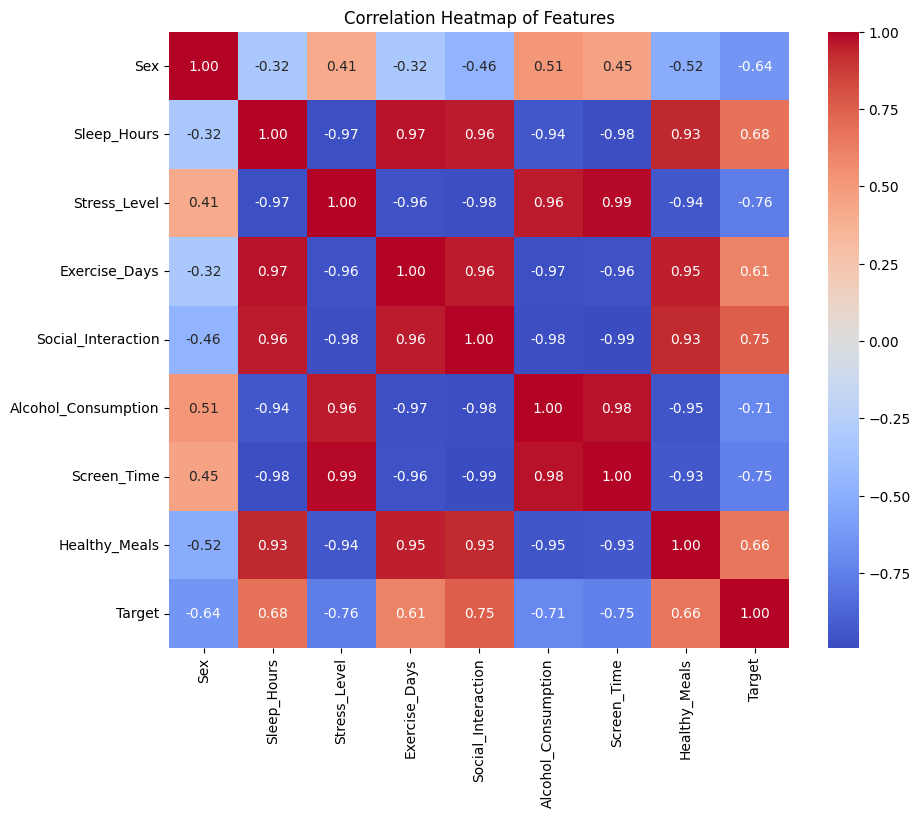

In [ ]:

plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df_final.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()